**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [1]:
!pip install xgboost
!pip install ucimlrepo

In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

In [9]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

In [10]:
#create a dataset from a link
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

# show a summary of dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [11]:
#split and show the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (242, 13)
Test set size: (61, 13)


# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [12]:
#import libraries
from sklearn.impute import SimpleImputer
#we standardize data to compute one-hot encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#to work in vectorize way
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
#show null values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [14]:
#a way to resolve null value is to insert mean
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
# first thing, we have to separate features and targets
X = df.drop('num', axis=1)  # Features
y = df['num']               # Target

#and we have to standardize numerical values
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#and create a new dataframe
df_scaled = pd.concat([X, y], axis=1)

#show a summary
print(df_scaled.head())

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [35]:
#starter and create new dataset
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(random_state=42)


In [36]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
xgb_predictions = xgb_model.predict(X_test)

In [38]:
#evalutate model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'accuracy: {xgb_accuracy}')

accuracy: 0.47540983606557374


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [39]:
#hyperparameters tester and create model
hyparam_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

xgb_classifier = XGBClassifier(random_state=42)

In [40]:
#Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, hyparam_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [41]:
#fit the model and finf out the best hp
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [42]:
#now we obtain the best model and discover the performance
best_xgb_model = grid_search.best_estimator_

y_pred_best = best_xgb_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Model Accuracy: 0.5245901639344263


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

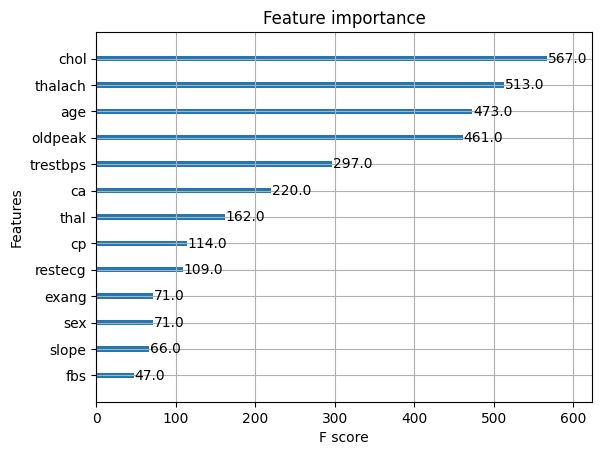

In [43]:
#first the plot
xgb.plot_importance(xgb_model)

In [51]:
# Get feature importances from the trained model
feature_importance = best_xgb_model.feature_importances_
feature_importance


array([0.05339538, 0.07292731, 0.14374614, 0.04066928, 0.04958028,
       0.05568036, 0.03595009, 0.05867104, 0.09173941, 0.07501023,
       0.07709044, 0.12793964, 0.11760049], dtype=float32)

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [53]:
# obviously the tuned model performs a lot better than the "naive" (not that naive lol) model.
print("Best Model Accuracy:", accuracy_best)
print(f'initial Model Accuracy: {xgb_accuracy}')

Best Model Accuracy: 0.5245901639344263
initial Model Accuracy: 0.47540983606557374


In [58]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [59]:
#best model
precision_best = precision_score(y_test, y_pred_best, average='macro')
print("Best Model Precision:", precision_best)

Best Model Precision: 0.2692857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#initial model
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
print(f'initial Model Precision: {xgb_precision}')

initial Model Precision: 0.21794117647058822


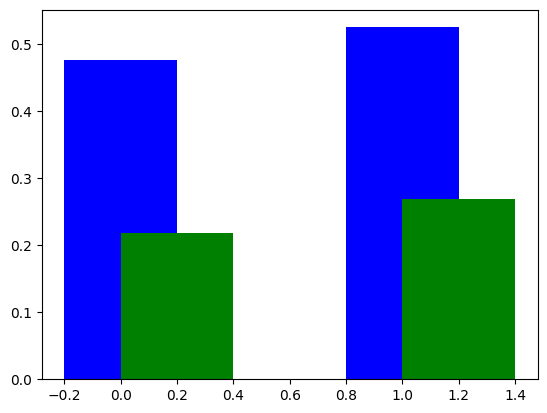

In [63]:
# accuracy and precision plots
labels = ['Default XGBoost', 'Best XGBoost']
acc_scores = [xgb_accuracy, accuracy_best]
prec_scores = [xgb_precision, precision_best]

#lenght of labels
x = range(len(labels))

# Plotting accuracy
plt.bar(x, acc_scores, width=0.4, label='Accuracy', color='b', align='center')

# Plotting precision
plt.bar(x, prec_scores, width=0.4, label='Precision', color='g', align='edge')

# Show the plot
plt.show()